In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use("ggplot")
sns.set_context("talk")

In [4]:
def load_mss_results():
    msses = [
        "0.00", "0.01", "0.02", "0.03", "0.04",
        "0.05", "0.06", "0.07", "0.08", "0.09",
        # "0.10", "0.11", "0.15", "0.20"
        "0.10", "0.15", "0.20"
    ]
    files = [
        f"../results/tclr_model_testing/all/TD4_MSS{i}_RT_MS_exhaustive_new_hoover/results.pickle" 
        for i in msses
    ]
    results = {i: pd.read_pickle(f) for i, f in zip(msses, files)}
    return results

In [62]:
def select_res_results(res, results):
    output = {}
    for mss, df in results.items():
        mdf = df["simmed_data"]
        rdf = mdf[mdf.index.get_level_values(0).isin(res)]
        output[mss] = rdf
    return output

In [63]:
def calc_res_score(res_results, metric="NSE"):
    if metric == "NSE":
        metric_func = r2_score
    else:
        metric_func = lambda x, y: mean_squared_error(x, y, squared=False)

    return {
        mss: df.groupby("site_name").apply(lambda x: metric_func(x["actual"], x["model"])) for mss, df in res_results.items()
    }

In [64]:
def plot_score_boxes(res_scores, title, score_metric):
    scores = pd.DataFrame.from_dict(res_scores).reset_index().melt(
        id_vars="site_name", value_name="score", var_name="mss"
    )
    fg = sns.catplot(
        data=scores,
        x="mss",
        y="score",
        kind="box",
        legend_out=False,
        height=10,
        aspect=19/10,
    )
    ax = fg.ax
    ax.set_title(title)
    ax.set_ylabel("MSS")
    ax.set_xlabel(score_metric)
    plt.show()  

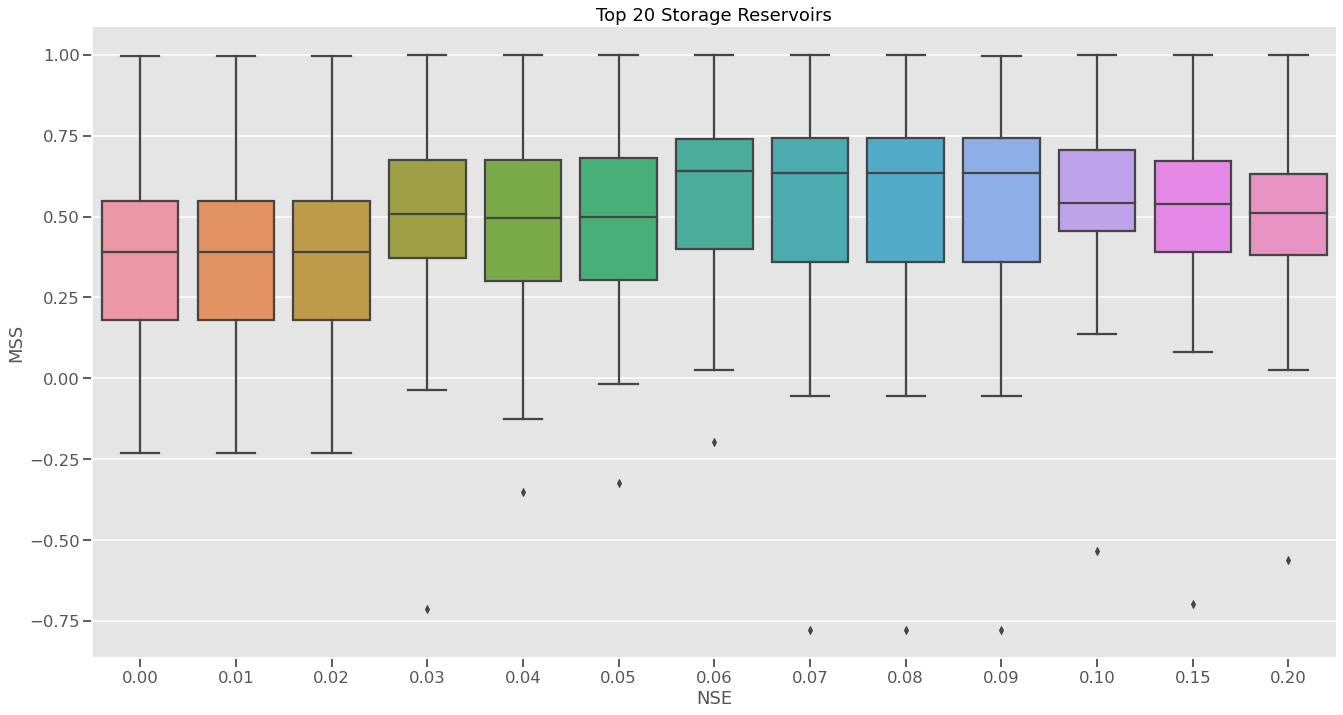

In [66]:
top_res = pd.read_pickle("../pickles/top_resers.pickle")
results = load_mss_results()
res_results = select_res_results(top_res["release_cv"], results)
res_scores = calc_res_score(res_results, metric="NSE")
plot_score_boxes(res_scores, "Top 20 Storage Reservoirs", "NSE")